# Kernel SVM

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C=1, gamma=0.01)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.01, random_state=0)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[102   1]
 [  5  63]]


In [7]:
print(accuracy_score(y_test, y_pred)*100)

96.49122807017544


## Predicting The Single Result

#### Uniformity_of_cell_size = 3
#### Uniformity_of_cell_shape = 2
#### Marginal_adesion = 10
#### Single_epithelial_cell_size = 5
#### Bare_nuclie = 10
#### Bland_Cromatin = 5
#### Normal_nucleoli = 4
#### Mitosis =  4

In [8]:
single_data = pd.DataFrame.from_dict({'Clum_thickness': [10],
                            'Uniformity_of_cell_size' : [5],
                            'Uniformity_of_cell_shape' : [5],
                           'Marginal_adesion' : [3],
                            'Single_epithelial_cell_size' : [6],
                            'Bare_nuclie' : [7],
                            'Bland_Cromatin' : [7],
                            'Normal_nucleoli' : [10],
                            'Mitosis' :  [1]})
single_data = single_data.values
single_data = sc.transform(single_data)

In [9]:
print('Class of Brest Cancer Patient : ', classifier.predict(single_data))

Class of Brest Cancer Patient :  [4]


# Applying K-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print('Accuracy : {:2f}'.format(accuracy.mean()*100))
print('Standard Deviation: {:2f}'.format(accuracy.std()*100))

Accuracy : 97.062594
Standard Deviation: 2.011077


# CAP Curve Analysis

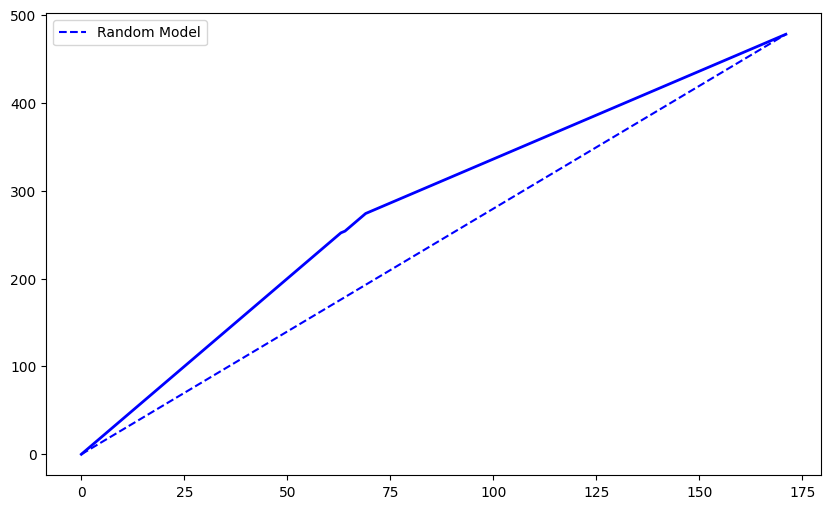

In [11]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count
plt.figure(figsize = (10, 6))
plt.plot([0, total], [0, one_count], c = 'b',
		linestyle = '--', label = 'Random Model')
plt.legend()
lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]
x_cap = np.arange(0, total + 1)
y_cap = np.append([0], np.cumsum(lm))
plt.plot(x_cap, y_cap, c = 'b', label = 'Random classifier', linewidth = 2)

## Grid Search

In [12]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=10, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameter = grid_search.best_params_
# print('Accuracy : ', best_accuracy*100)
# print('Best Parameters are :\n', best_parameter)

Best parameters : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}